In [91]:

import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from fredapi import Fred
from dataset import Dataset
import gtab
#sci-kit imports
from sklearn.linear_model import LinearRegression, Ridge
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.pipeline
from visualizations import Visualizer
np.random.seed(42)

In [92]:
#controling whether tensorflow does recognize my GPU
tf.config.get_visible_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [93]:
data = Dataset.get_btc_data()

In [94]:
data = data.loc["2014-9-17":]

In [95]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [96]:
{col: [data[col].isnull().sum(), f'% {np.round(np.mean(data[col].isnull()*100), 3)}'
      ] for col in data.columns if data[col].isnull().any()}

{'BTC / Capitalization, market, estimated supply, USD': [1739, '% 57.45'],
 'Wiki_btc_search': [287, '% 9.481'],
 'Close_^DJI': [939, '% 31.021'],
 'Close_^GSPC': [939, '% 31.021'],
 'Close_GC=F': [942, '% 31.12'],
 'Close_^VIX': [939, '% 31.021'],
 'Close_^IXIC': [939, '% 31.021'],
 'Close_SMH': [939, '% 31.021'],
 'Close_VGT': [939, '% 31.021'],
 'Close_XSD': [939, '% 31.021'],
 'Close_IYW': [939, '% 31.021'],
 'Close_FTEC': [939, '% 31.021'],
 'Close_IGV': [939, '% 31.021'],
 'Close_QQQ': [939, '% 31.021'],
 'Wiki_crypto_search': [287, '% 9.481'],
 'USD_EUR_rate': [122, '% 4.03']}

In [97]:

data['Wiki_crypto_search'] = data['Wiki_crypto_search'].fillna(0)
data['Wiki_btc_search'] = data['Wiki_btc_search'].fillna(0)
#to be changed
data["BTC / Capitalization, market, estimated supply, USD"] = data["BTC / Capitalization, market, estimated supply, USD"].fillna(0)

In [98]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [99]:
data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']] = data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']].ffill()
data["BTC-USD"] = data["BTC-USD"].shift(-1)
data = data.dropna()

In [100]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,424.440002
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,394.795990
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,402.152008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,228040.789177,...,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621,16919.804688
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621,16717.173828
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16552.572266
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16642.341797


<Axes: >

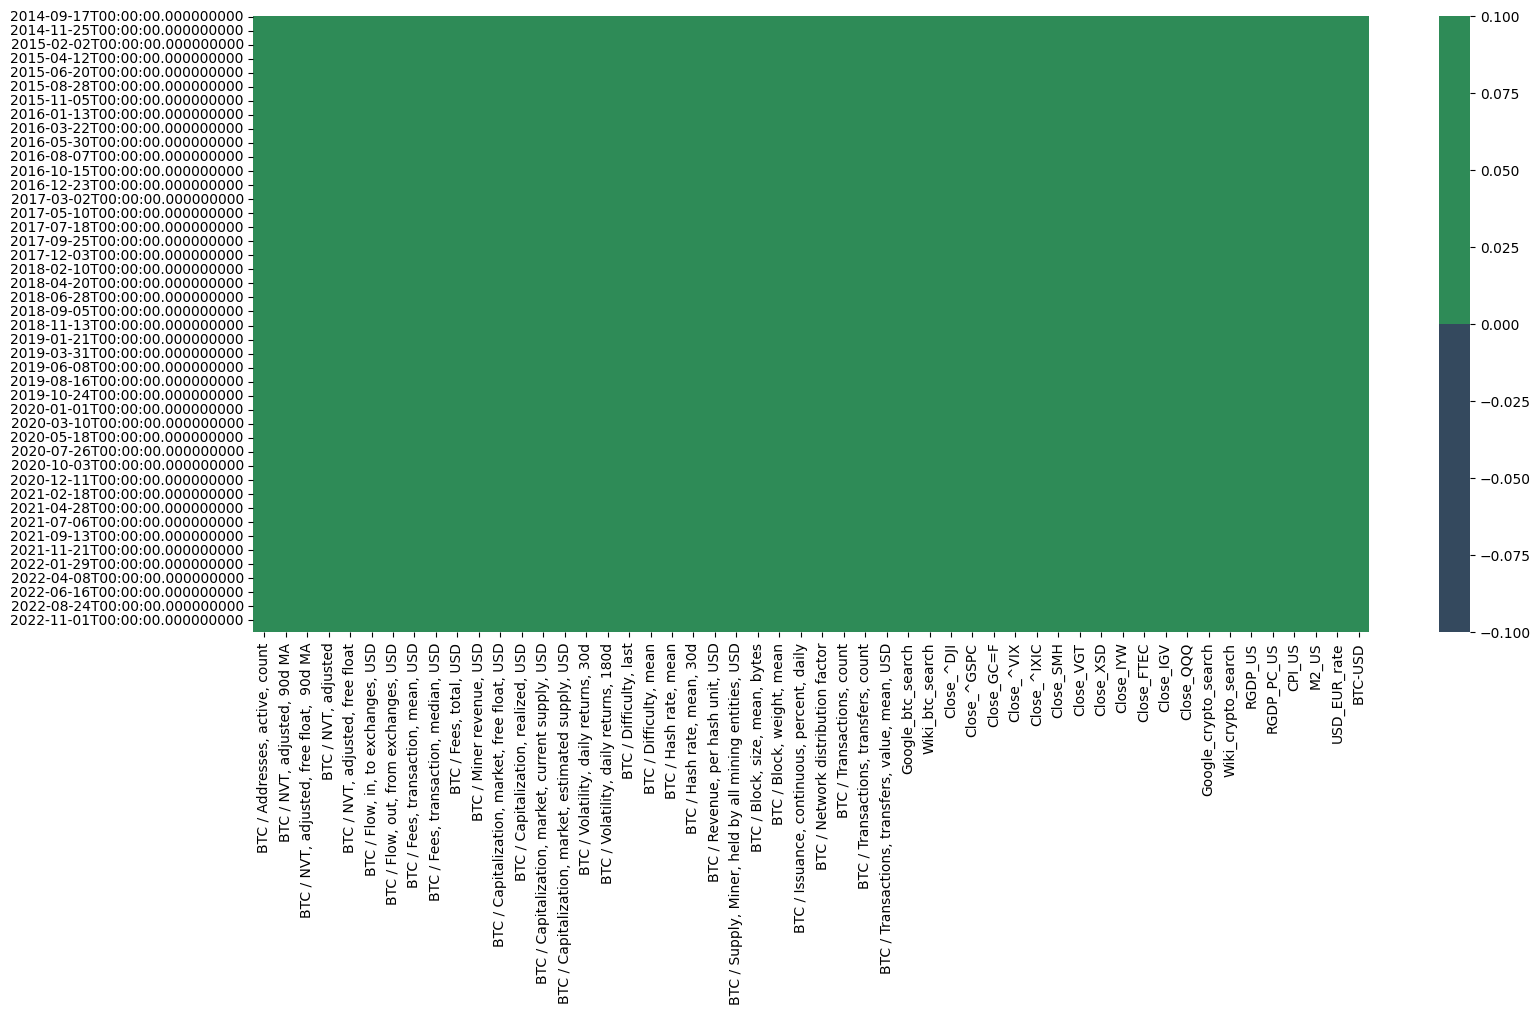

In [101]:
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

In [102]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,424.440002
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,394.795990
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,402.152008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,228040.789177,...,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621,16919.804688
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621,16717.173828
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16552.572266
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16642.341797


In [103]:
data.iloc[:, :-1]

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_FTEC,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,27.694853,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,27.885284,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,27.767048,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,27.767048,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,27.767048,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,228040.789177,...,93.671127,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,93.671127,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,92.739174,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,91.212357,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622


In [150]:
train_data, validation_data, train_target, validation_target = sklearn.model_selection.train_test_split(data.iloc[:, :-1], data["BTC-USD"], test_size = 0.1, random_state=42, shuffle=False)
scaler = sklearn.preprocessing.RobustScaler()
poly_features = sklearn.preprocessing.PolynomialFeatures()
pipe = sklearn.pipeline.Pipeline([("scaler",scaler),("estimator",Ridge())])
pipe.fit(train_data,train_target)
parameter_grid = {"estimator__alpha": [0.1,0.2,0.3,0.5,3,7,8,10,25,50,70]}
split = sklearn.model_selection.TimeSeriesSplit(n_splits=3)
model = sklearn.model_selection.GridSearchCV(pipe, parameter_grid,cv=split,scoring = 'r2', verbose = 4).fit(train_data,train_target)
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV 1/3] END ..............estimator__alpha=0.1;, score=0.974 total time=   0.0s
[CV 2/3] END ..............estimator__alpha=0.1;, score=0.711 total time=   0.0s
[CV 3/3] END ..............estimator__alpha=0.1;, score=0.987 total time=   0.0s
[CV 1/3] END ..............estimator__alpha=0.2;, score=0.973 total time=   0.0s
[CV 2/3] END ..............estimator__alpha=0.2;, score=0.713 total time=   0.0s
[CV 3/3] END ..............estimator__alpha=0.2;, score=0.987 total time=   0.0s
[CV 1/3] END ..............estimator__alpha=0.3;, score=0.972 total time=   0.0s
[CV 2/3] END ..............estimator__alpha=0.3;, score=0.718 total time=   0.0s
[CV 3/3] END ..............estimator__alpha=0.3;, score=0.987 total time=   0.0s
[CV 1/3] END ..............estimator__alpha=0.5;, score=0.970 total time=   0.0s
[CV 2/3] END ..............estimator__alpha=0.5;, score=0.730 total time=   0.0s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.04956e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.02214e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.00556e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.41731e-26): r

[CV 3/3] END ..............estimator__alpha=0.5;, score=0.986 total time=   0.0s
[CV 1/3] END ................estimator__alpha=3;, score=0.931 total time=   0.0s
[CV 2/3] END ................estimator__alpha=3;, score=0.838 total time=   0.0s
[CV 3/3] END ................estimator__alpha=3;, score=0.969 total time=   0.0s
[CV 1/3] END ................estimator__alpha=7;, score=0.860 total time=   0.0s
[CV 2/3] END ................estimator__alpha=7;, score=0.898 total time=   0.0s
[CV 3/3] END ................estimator__alpha=7;, score=0.951 total time=   0.0s
[CV 1/3] END ................estimator__alpha=8;, score=0.841 total time=   0.0s
[CV 2/3] END ................estimator__alpha=8;, score=0.906 total time=   0.0s


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.99129e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.49941e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.23975e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV 3/3] END ................estimator__alpha=8;, score=0.947 total time=   0.0s
[CV 1/3] END ...............estimator__alpha=10;, score=0.803 total time=   0.0s
[CV 2/3] END ...............estimator__alpha=10;, score=0.917 total time=   0.0s
[CV 3/3] END ...............estimator__alpha=10;, score=0.940 total time=   0.0s
[CV 1/3] END ...............estimator__alpha=25;, score=0.543 total time=   0.0s
[CV 2/3] END ...............estimator__alpha=25;, score=0.942 total time=   0.0s
[CV 3/3] END ...............estimator__alpha=25;, score=0.906 total time=   0.0s
[CV 1/3] END ...............estimator__alpha=50;, score=0.231 total time=   0.0s
[CV 2/3] END ...............estimator__alpha=50;, score=0.928 total time=   0.0s
[CV 3/3] END ...............estimator__alpha=50;, score=0.873 total time=   0.0s
[CV 1/3] END ...............estimator__alpha=70;, score=0.058 total time=   0.0s
[CV 2/3] END ...............estimator__alpha=70;, score=0.901 total time=   0.0s
[CV 3/3] END ...............

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.81042e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.78667e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.57734e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.89954e-24): r

In [159]:
model = pipe.fit(train_data,train_target)

In [160]:
[(el[0].shape, el[1].shape) for el in split.split(train_data)]

[((683,), (680,)), ((1363,), (680,)), ((2043,), (680,))]

In [161]:
validation_data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_FTEC,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate
2022-03-02,1091796.0,57.625960,44.467309,60.352625,46.571352,9.126885e+08,9.787781e+08,4.309170,1.742669,1.249452e+06,...,117.522324,344.197449,342.314697,61.776757,7462.0,21738.871,65284.0,8.459524,21651.9,1.1102
2022-03-03,1011448.0,56.048539,43.249383,49.680370,38.335438,8.588087e+08,8.302779e+08,3.177610,1.125209,8.605139e+05,...,115.664688,335.488800,337.424774,61.776757,7396.0,21738.871,65284.0,8.459524,21651.9,1.1053
2022-03-04,949176.0,52.231733,40.304063,51.327825,39.606572,7.137221e+08,8.412254e+08,2.300239,0.782128,5.934416e+05,...,113.433556,328.289917,332.534821,61.776757,6632.0,21738.871,65284.0,8.459524,21651.9,1.0912
2022-03-05,801293.0,52.845158,40.777436,70.432732,54.348712,3.359080e+08,3.351282e+08,1.951078,0.685280,4.412282e+05,...,113.433556,328.289917,332.534821,61.776757,5922.0,21738.871,65284.0,8.459524,21651.9,1.0912
2022-03-06,771254.0,52.493886,40.506206,158.158534,122.040920,3.036040e+08,3.204319e+08,1.746402,0.591350,3.589892e+05,...,113.433556,328.289917,332.534821,61.776757,6112.0,21738.871,65284.0,8.459524,21651.9,1.0912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-25,731599.0,70.161801,51.321173,253.498685,185.426396,1.343555e+08,1.281242e+08,1.159063,0.534693,2.280408e+05,...,93.671127,253.290985,265.525391,26.035326,3014.0,21989.981,65799.0,6.516674,21453.1,1.0621
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,3.063498e+05,...,93.671127,253.290985,265.525391,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,1.0621
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,3.938003e+05,...,92.739174,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,3.404568e+05,...,91.212357,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622


In [162]:
predictions = model.predict(validation_data)

In [163]:
y_pred = pd.Series(predictions, index=validation_data.index)
train_pred = pd.Series(model.predict(train_data), index = train_data.index)

/tmp/ipykernel_47948/3059999588.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


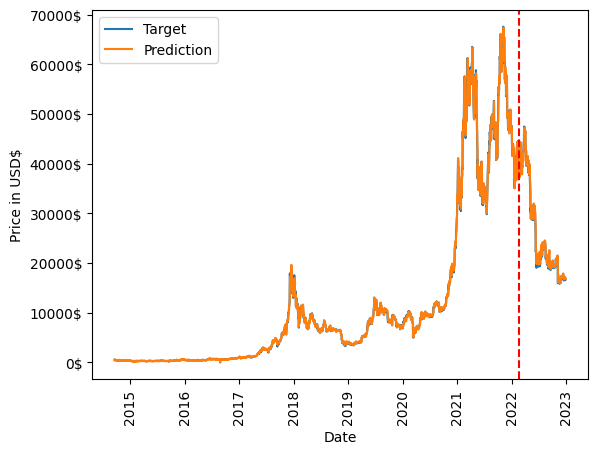

In [164]:
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target, train_pred, validation_target, y_pred)
fig.show()

<Axes: >

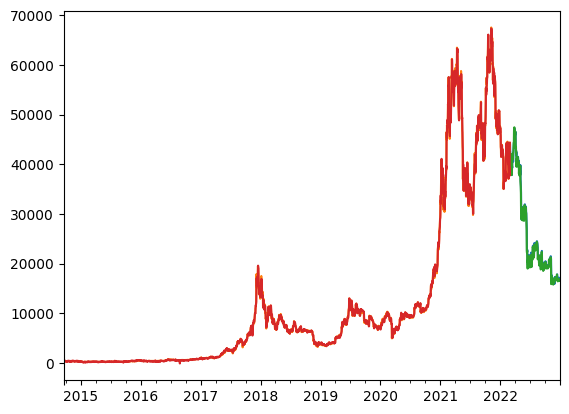

In [165]:
y_pred.plot()
train_target.plot()
validation_target.plot()
train_pred.plot()

In [166]:
data.columns

Index(['BTC / Addresses, active, count', 'BTC / NVT, adjusted, 90d MA',
       'BTC / NVT, adjusted, free float,  90d MA', 'BTC / NVT, adjusted',
       'BTC / NVT, adjusted, free float', 'BTC / Flow, in, to exchanges, USD',
       'BTC / Flow, out, from exchanges, USD',
       'BTC / Fees, transaction, mean, USD',
       'BTC / Fees, transaction, median, USD', 'BTC / Fees, total, USD',
       'BTC / Miner revenue, USD',
       'BTC / Capitalization, market, free float, USD',
       'BTC / Capitalization, realized, USD',
       'BTC / Capitalization, market, current supply, USD',
       'BTC / Capitalization, market, estimated supply, USD',
       'BTC / Volatility, daily returns, 30d',
       'BTC / Volatility, daily returns, 180d', 'BTC / Difficulty, last',
       'BTC / Difficulty, mean', 'BTC / Hash rate, mean',
       'BTC / Hash rate, mean, 30d', 'BTC / Revenue, per hash unit, USD',
       'BTC / Supply, Miner, held by all mining entities, USD',
       'BTC / Block, size, mean, b